# Analyzing TikTok Influencer Data

### Introduction to Data Analysis with Python

Data Import and Initial Inspection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('../data/raw/Top100Tiktokers.csv')

# Display the first few rows
df.head()

- What is the structure of our dataset? What columns do we have?
- What data types are we working with?
- Are there any missing values we need to handle?

In [ ]:
# Let's check our data info
df.info()

# Check for missing values
df.isnull().sum()

Data cleaning and preperation

In [10]:
# Convert follower counts to millions for easier interpretation
df['Followers_M'] = df['Followers'] / 1_000_000
df['Likes_B'] = df['Likes'] / 1_000_000_000

# Reset index to make rank a column
df = df.reset_index(drop=True)

In [ ]:
df

EDA (Exploratory Data Analysis)

In [ ]:
# Get basic statistics of numerical columns
df.describe()

In [ ]:
# Create correlation matrix
correlation = df[['Followers', 'Following', 'Uploads', 'Likes']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Metrics')
plt.show()

Targeted Analysis

In [17]:
# Calculate engagement rate (Likes per Follower)
df['Engagement_Rate'] = (df['Likes'] / df['Followers']) * 100

# Display top 5 accounts by engagement rate
df[['Username', 'Engagement_Rate']].sort_values(by='Engagement_Rate', ascending=False).head()

,Username,Engagement_Rate
98,Faisal shaikh,62500.000000
46,Barstool Sports,19203.747073
30,ESPN,12929.292929
93,Kunno,9876.543210
77,Brooke Monk,8857.142857


- Which creators have the highest engagement rates?
- Is there a relationship between follower count and engagement rate?
- What might explain variations in engagement rates?

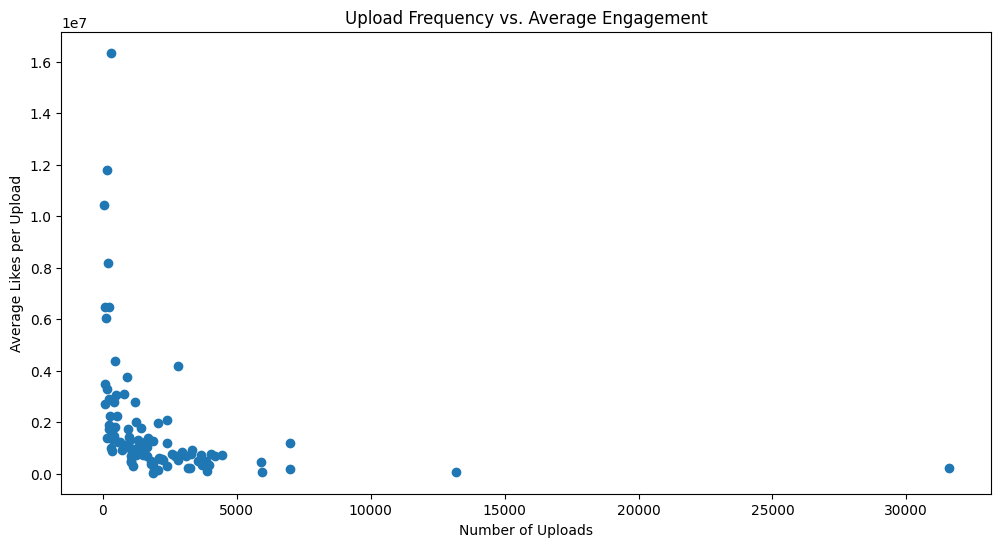

In [15]:
# Calculate average likes per upload
df['Likes_per_Upload'] = df['Likes'] / df['Uploads']

# Compare uploads vs. likes per upload
plt.figure(figsize=(12, 6))
plt.scatter(df['Uploads'], df['Likes_per_Upload'])
plt.xlabel('Number of Uploads')
plt.ylabel('Average Likes per Upload')
plt.title('Upload Frequency vs. Average Engagement')
plt.show()